In [2]:
import pytse_client as tse
import matplotlib.pyplot as plt

tse.download(symbols="فملی"و adjust=True) 
data = tse.Ticker("فملی")

  Using cached pytse_client-0.14.0-py3-none-any.whl (105 kB)
  Using cached aiohttp-3.8.4-cp38-cp38-macosx_10_9_x86_64.whl (359 kB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached black-22.12.0-py3-none-any.whl (167 kB)
  Using cached jdatetime-3.8.2-py3-none-any.whl (13 kB)
  Using cached lxml-4.9.2-cp38-cp38-macosx_10_15_x86_64.whl (4.7 MB)
  Using cached pandas-2.0.1-cp38-cp38-macosx_10_9_x86_64.whl (11.6 MB)
  Using cached requests-2.29.0-py3-none-any.whl (62 kB)
  Using cached tenacity-7.0.0-py2.py3-none-any.whl (23 kB)
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.1.0-cp38-cp38-macosx_10_9_x86_64.whl (123 kB)
  Using cached multidict-6.0.4-cp38-cp38-macosx_10_9_x86_64.whl (29 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
  Using cached yarl-1.9.2-cp38-cp38-macosx_10_9_x86_64.whl (65 kB)
  Using cached frozenlist-1.3.3-cp38-cp38-macosx_10_9_x86_64.whl (36 kB)
  Using cached aiosignal-1.3.1-

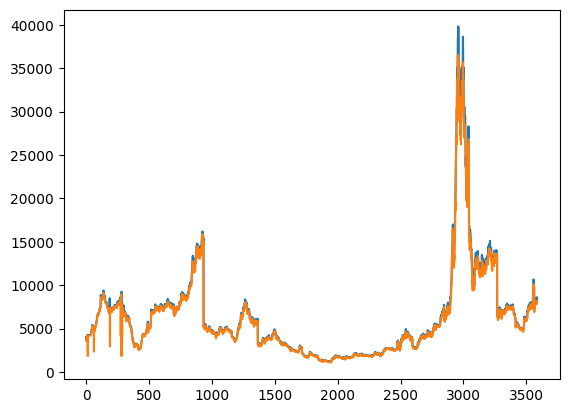

In [5]:
#  stock lstm #

# plot data #
plt.plot(data.history["high"])
plt.plot(data.history["low"])
plt.show()



In [ ]:
## stock lstm ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# load data #
tse.download(symbols="فملی") 
data = tse.Ticker("فملی")

# plot data #
plt.plot(data.history["high"])
plt.plot(data.history["low"])
plt.show()

# data preprocessing #
data = data.history
data = data[["high", "low"]]
data = data.values
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

# split data #
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# create dataset #
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), :])
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# reshape data #
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)

# create model #
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 2)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.summary()

# train model #
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# predict #
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# invert predictions #
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# calculate RMSE #
import math
from sklearn.metrics import mean_squared_error
train_score = math.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print("Train Score: %.2f RMSE" % (train_score))
print("Test Score: %.2f RMSE" % (test_score))

# plot #
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict)+time_step, :] = train_predict
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(time_step*2)+1:len(data)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

# predict future #
x_input = test_data[len(test_data)-time_step:len(test_data), :]
x_input = x_input.reshape(1, time_step, 2)
future = model.predict(x_input)
future = scaler.inverse_transform(future)
print(future)

# save model #
model.save("model.h5")




In [8]:
# data preprocessing #
data = data[["high", "low"]]
data = data.values
plt.plot(data.values)
plt.show()
# scaler = MinMaxScaler(feature_range=(0,1))
# data = scaler.fit_transform(data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

TypeError: unhashable type: 'numpy.ndarray'

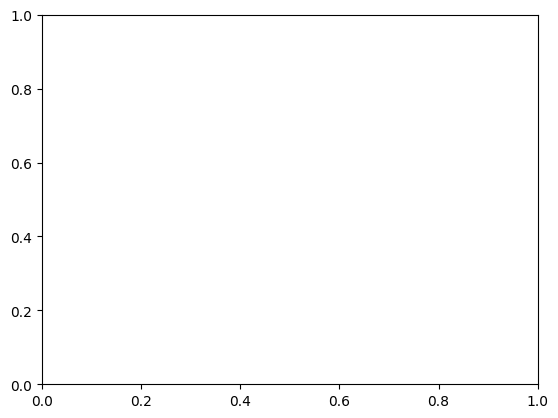

In [5]:
## stock lstm ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# load data #

data = pd.read_csv("data.csv")



# data preprocessing #
plt.plot(data.values)
plt.show()
data = data[["high", "low"]]
data = data.values
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

# split data #
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# create dataset #
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), :])
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# reshape data #
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)

In [1]:
# load model #
from tensorflow.keras.models import load_model
model = load_model("fameli.h5")


2023-04-30 13:30:26.639805: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 13:31:45.783473: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-30 13:31:45.787012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split